In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from geonamescache import GeonamesCache
from unidecode import unidecode
from sklearn.cluster import KMeans
from kneed import KneeLocator
from cartopy.crs import PlateCarree
import re
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')

# 1. Obtener dataset

1. Cargar data set de puestos de empleo de Data Science.

In [29]:
df=pd.read_csv('jobs_cities.csv')
df

,Titles,Cities
0,Data Science Manager job in New York NY,York
1,Director Data Science job in Seattle WA,Seattle
2,Data Science Instructor job in San Antonio TX,San Antonio
3,"Senior Manager, Sales Data Science and Analyti...",Boston
4,Data Scientist job in Aurora CO,Aurora
...,...,...
577,Data Scientist Cambridge,Cambridge
578,Data Science Analyst London,London
579,Junior and Mid level Data Scientists Bristol,Bristol
580,Senior Financial Data Scientist- Global Hedge ...,London


In [30]:
gc = GeonamesCache()
cities = [city['name'] for city in gc.get_cities().values()]

In [31]:
latitudes, longitudes = [], []
for city_name in df.Cities.values:
    city = max(gc.get_cities_by_name(city_name), 
              key=lambda x: list(x.values())[0]['population'])
    city = list(city.values())[0]
    latitudes.append(city['latitude']) 
    longitudes.append(city['longitude'])

df = df.assign(Latitude=latitudes, Longitude=longitudes)

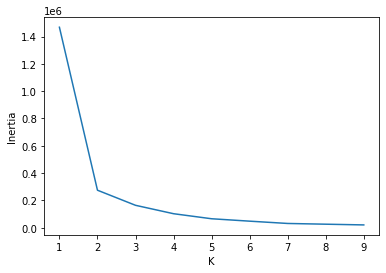

In [32]:
coordinates = df[['Latitude', 'Longitude']].values
k_values = range(1, 10)
inertia_values = []
for k in k_values:
    inertia_values.append(KMeans(k).fit(coordinates).inertia_)

plt.plot(range(1, 10), inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [33]:
klocator = KneeLocator(range(1, 10), inertia_values, curve="convex", direction="decreasing")
print(f'k={klocator.elbow}')

k=2


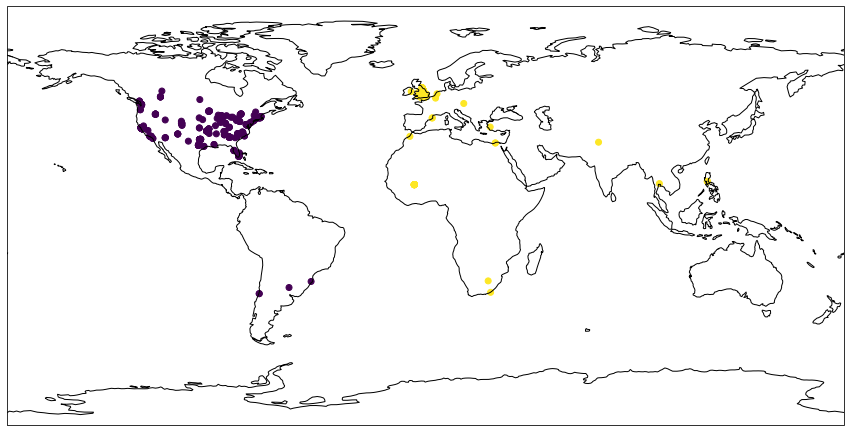

In [34]:
def plot_clusters(clusters, longitudes, latitudes):
    plt.figure(figsize=(15, 12))
    ax = plt.axes(projection=PlateCarree())
    ax.coastlines()
    ax.scatter(longitudes, latitudes, c=clusters)
    ax.set_global()
    plt.show()


df['Cluster'] = KMeans(2).fit_predict(coordinates)
plot_clusters(df.Cluster, df.Longitude, df.Latitude)

###  Conclusión
En el gráfico se puede ver que de los tres portales de empleo que demandan personas con competencias en Data Science, obviamente USA ofrece más ofertas y en la mayoría se concentran en el este de Estados Unidos.